In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Insert Revenue and Regret from test_data into train_data
train_data.update(test_data)

# Separate data without DP to make face plots more readable
dp_data = train_data.query('Noise > 0').query('Clip > 0')
no_dp_data = train_data.query('Noise == 0').query('Clip == 0')

## This notebook visualizes how increasing noise and clipping parameters of the differentially private optimizer changes progression of regret, revenue and epsilon.  Epsilon measures the robustness of the model. Progression denotes the change of a measure in regard to the iterations of the training. The setting is additive_5x10_uniform.

### The following two figures visualize the progression of regret and revenue, from out-of-sample tests as the network gets trained, for the run without differential privacy (no noise, no clipping):

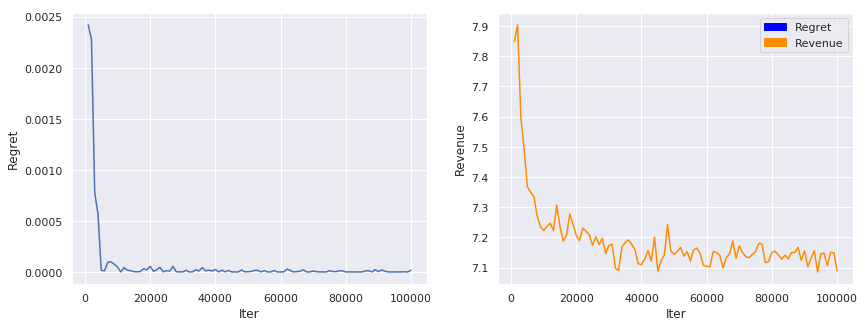

In [3]:
if not no_dp_data.empty:
    sns.set(rc={'figure.figsize':(14,5)})
    v0, ax = plt.subplots(1,2)
    v0 = sns.lineplot(x='Iter', y='Regret', data=no_dp_data, ax=ax[0])
    v0 = sns.lineplot(x='Iter', y='Revenue', data=no_dp_data, color='darkorange', ax=ax[1])
    regret = mpatches.Patch(color='blue', label='Regret')
    revenue = mpatches.Patch(color='darkorange', label='Revenue')
    v0.legend(handles=[regret, revenue])

### The following facets visualize the change of revenue evolution, as the noise_multiplier changes:

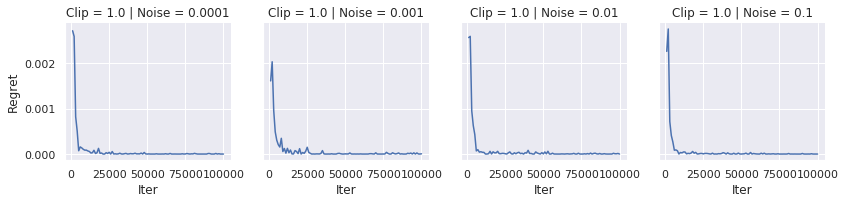

In [4]:
v1 = sns.FacetGrid(dp_data, col='Noise', row='Clip')
v1 = v1.map(plt.plot, 'Iter', 'Regret')

### The following facets visualize the change of revenue evolution, as the noise_multiplier changes:

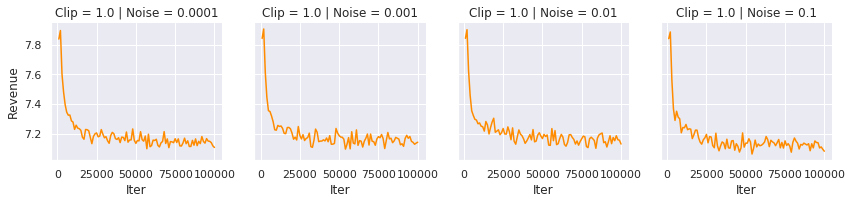

In [5]:
v2 = sns.FacetGrid(dp_data, col='Noise', row='Clip')
v2 = v2.map(plt.plot, 'Iter', 'Revenue', color='darkorange')

### The following facets visualize the change of epsilon evolution, as the noise_multiplier changes:

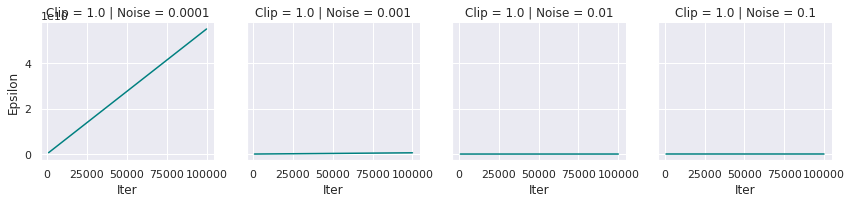

In [6]:
v3 = sns.FacetGrid(dp_data, col='Noise', row='Clip')
v3 = v3.map(plt.plot, 'Iter', 'Epsilon', color='teal')

**Note**: The out-of-sample tests were run with the following parameters:
```python
__C.test.num_misreports = 1
__C.test.gd_iter = 1
```